In [33]:
#Step 1: Data Preprocessing
import pandas as pd
import cv2
import numpy as np

# Load the CSV file
data = pd.read_csv('DevelopmentData.csv')

# Data cleaning and preprocessing if needed
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Normalize values
data[['FirstObjectDistance_X', 'FirstObjectDistance_Y', 'SecondObjectDistance_X', 'SecondObjectDistance_Y', 'ThirdObjectDistance_X', 'ThirdObjectDistance_Y', 'FourthObjectDistance_X', 'FourthObjectDistance_Y']] /= 128
data['VehicleSpeed'] /= 256
data[['FirstObjectSpeed_X', 'FirstObjectSpeed_Y', 'SecondObjectSpeed_X', 'SecondObjectSpeed_Y', 'ThirdObjectSpeed_X', 'ThirdObjectSpeed_Y', 'FourthObjectSpeed_X', 'FourthObjectSpeed_Y']] /= 256

# Step 2: Load the pre-trained model
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Step 3: Set up the video stream
cap = cv2.VideoCapture(0)  # Assuming you're using the default camera



error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\darknet\darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file: yolov3.cfg in function 'cv::dnn::dnn4_v20230620::readNetFromDarknet'


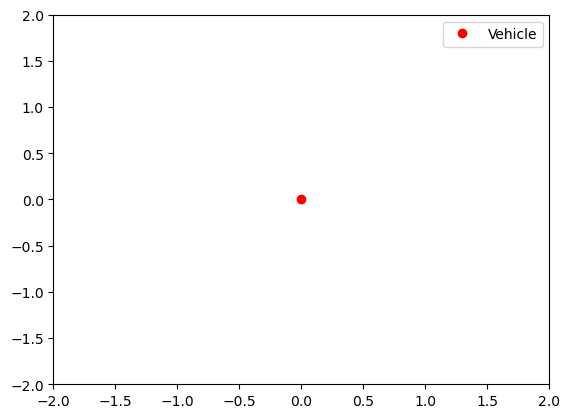

In [13]:
#Step 2: Environment Visualization
import matplotlib.pyplot as plt

# Create a figure for 2D visualization
fig, ax = plt.subplots()

# Define the vehicle position
vehicle_x = 0
vehicle_y = 0

# Plot the vehicle
ax.plot(vehicle_x, vehicle_y, 'ro', label='Vehicle')

# Customize the plot (e.g., set axis limits)
ax.set_xlim([-2, 2])  # Assuming units are in meters
ax.set_ylim([-2, 2])

# Add legend
ax.legend()

# Show the plot
plt.show()


In [15]:
#Step 3: Object Filtering
# Assuming you have a way to identify the relevant object (e.g., based on distance or speed)
# For example, let's assume it's the first object
relevant_object = data.iloc[0]



In [20]:
#Step 4: Scenario Identification

#Longitiduinal scenario
def identify_longitudinal_scenario(vehicle_speed, object_speed, longitudinal_distance):
    if abs(longitudinal_distance) < 5 and object_speed > vehicle_speed:
        return 'Potential Rear-end Collision'
    elif longitudinal_distance > 0 and object_speed < vehicle_speed:
        return 'Overtaking Opportunity'
    else:
        return 'Normal Driving'

object_speed = ((relevant_object['FirstObjectSpeed_X'] ** 2) + (relevant_object['FirstObjectSpeed_Y'] ** 2)) ** 0.5
longitudinal_distance = new_x - vehicle_x

scenario = identify_longitudinal_scenario(relevant_object['VehicleSpeed'], object_speed, longitudinal_distance)

#Turning scenario
def identify_turning_scenario(yaw_rate, object_speed, lateral_distance):
    if abs(yaw_rate) > 0.1 and lateral_distance < 2 and object_speed > 2:
        return 'Potential Collision During Turn'
    else:
        return 'Normal Driving'

lateral_distance = new_y - vehicle_y

scenario = identify_turning_scenario(relevant_object['YawRate'], object_speed, lateral_distance)

#Crossing Scenario
def identify_crossing_scenario(lateral_distance, object_speed):
    if abs(lateral_distance) < 2 and object_speed > 10:
        return 'Potential Collision While Crossing'
    else:
        return 'Normal Driving'

scenario = identify_crossing_scenario(lateral_distance, object_speed)




In [21]:
#Step 5: Vehicle and Object Motion Simulation
time_interval = 0.1  # Time interval in seconds

new_x = relevant_object['FirstObjectDistance_X'] + relevant_object['FirstObjectSpeed_X'] * time_interval
new_y = relevant_object['FirstObjectDistance_Y'] + relevant_object['FirstObjectSpeed_Y'] * time_interval


In [22]:
#Step 6: Measurements
longitudinal_distance = new_x - vehicle_x
lateral_distance = new_y - vehicle_y

object_speed = ((relevant_object['FirstObjectSpeed_X'] ** 2) + (relevant_object['FirstObjectSpeed_Y'] ** 2)) ** 0.5


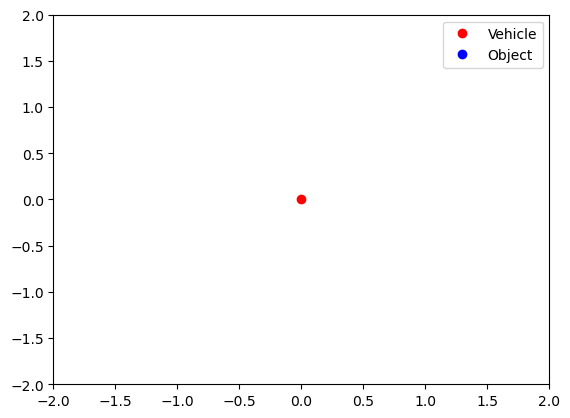

In [28]:
#Step 7: Real-time Visualization
import matplotlib.pyplot as plt

# Create a figure for 2D visualization
fig, ax = plt.subplots()

# Plot the vehicle and object
ax.plot(vehicle_x, vehicle_y, 'ro', label='Vehicle')
ax.plot(new_x, new_y, 'bo', label='Object')

# Customize the plot (e.g., set axis limits)
ax.set_xlim([-2, 2])  # Assuming units are in meters
ax.set_ylim([-2, 2])

# Add legend
ax.legend()

# Show the plot
plt.show()






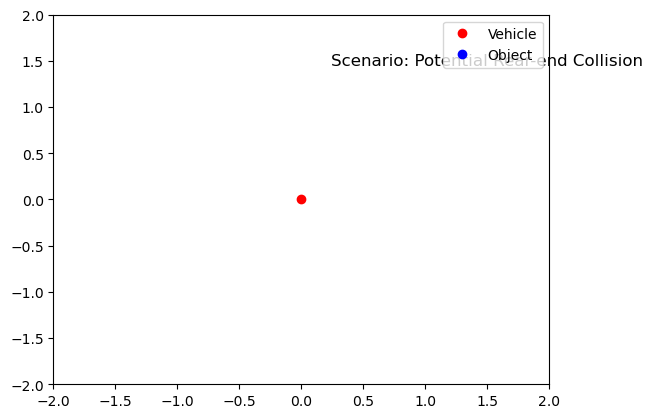

In [24]:
#Step 8: Scenario Labeling
# Assuming you have identified a scenario in the previous steps
scenario = "Potential Rear-end Collision"  # Example scenario

# You can add labels based on the identified scenario
import matplotlib.pyplot as plt

# Create a figure for 2D visualization
fig, ax = plt.subplots()

# Plot the vehicle and object
ax.plot(vehicle_x, vehicle_y, 'ro', label='Vehicle')
ax.plot(new_x, new_y, 'bo', label='Object')

# Customize the plot (e.g., set axis limits)
ax.set_xlim([-2, 2])  # Assuming units are in meters
ax.set_ylim([-2, 2])

# Add legend
ax.legend()

# Add a text label for the scenario
ax.text(1.5, 1.5, f'Scenario: {scenario}', fontsize=12, ha='center', va='center', color='black')

# Show the plot
plt.show()


In [29]:
#Step 9: Output
# Save the figure as an image
fig.savefig('output.png')
